In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
company_data = pd.read_csv(r'C:\Users\ASHOK\Downloads\Quality Assessment.csv')
print("First few rows of the DataFrame:")
company_data.head(10)

First few rows of the DataFrame:


,Id,Assembly Line,Quantity (lts.),CO2 dissolved,Time limit Crossed
0,1263945,B,1.971072,14.401617,0
1,1828129,B,2.073388,14.137750,0
2,1871804,A,2.019492,14.774384,0
3,1128634,A,2.004422,15.130565,0
4,1848595,B,2.025784,15.756478,0
5,1960254,B,2.070400,12.940620,0
6,1669282,B,NaN,16.664851,0
7,1036391,B,1.903055,12.604429,1
8,1874678,A,1.990956,14.972120,0
9,1619807,A,2.014521,12.645058,0


In [2]:
# How many observations are there in the dataset?
num_observations = company_data.shape[0]
print(f'There are {num_observations} observations.')

There are 299 observations.


In [3]:
# How many features have missing values?
print("Missing values count in each column:")
print(company_data.isnull().sum())
print()
print('Missing values percentage in each column with:')
print(company_data.isnull().sum() *100/company_data.shape[0])

Missing values count in each column:
Id                    0
Assembly Line         0
Quantity (lts.)       6
CO2 dissolved         0
Time limit Crossed    0
dtype: int64

Missing values percentage in each column with:
Id                    0.000000
Assembly Line         0.000000
Quantity (lts.)       2.006689
CO2 dissolved         0.000000
Time limit Crossed    0.000000
dtype: float64


In [4]:
# Choose True or False for the statement below.
# ‘There are duplicates in the dataset.’
company_data.duplicated().sum()
print("Duplicate values count in the Dataframe:",company_data.duplicated().sum())
if company_data.duplicated().sum() == 0:
  print('False')
else:
  print('True')

Duplicate values count in the Dataframe: 0
False


In [5]:
# What is the median for the quantity feature? Round it off to 3 decimal places.
median_of_quantity = round(company_data['Quantity (lts.)'].median(),3)
print('The median for the quantity feature is:',median_of_quantity)

The median for the quantity feature is: 1.998


In [6]:
# What is the range of CO2 dissolved feature? Please round it off to 2 decimal places.
CO2_dissolved_min = company_data['CO2 dissolved'].min()
CO2_dissolved_max = company_data['CO2 dissolved'].max()
range_of_CO2 = round((CO2_dissolved_max - CO2_dissolved_min), 2)
print('The range of CO2 dissolved feature is:', range_of_CO2)

The range of CO2 dissolved feature is: 147.93


In [7]:
# Choose True or False for the statement below.
# ‘There are outliers in the CO2 dissolved feature.’
Q1 = company_data['CO2 dissolved'].quantile(0.25) # Calculate the first quartile (Q1)

Q3 = company_data['CO2 dissolved'].quantile(0.75) # Calculate the third quartile (Q3)

IQR = Q3 - Q1 # Calculate the Interquartile Range (IQR)

upper_cutoff = Q3 + 1.5 * IQR # Calculate the upper cutoff

lower_cutoff = Q1 - 1.5 * IQR # Calculate the lower cutoff

outliers = [x for x in company_data['CO2 dissolved'] if x < lower_cutoff or x > upper_cutoff]

print('Outliers in the CO2 dissolved feature is:',outliers)

Outliers in the CO2 dissolved feature is: [120.1075286, 120.5028891, 2.25345405, 130.1797706, 150.180978, 140.2333676]


In [8]:
# What is the cardinality of the Assembly line feature in the dataset?
cardinality = company_data['Assembly Line'].nunique()
print('The cardinality of the Rating variable in the dataset is:',cardinality)

The cardinality of the Rating variable in the dataset is: 4


# Data Cleaning:

In [9]:
# Standardise the Assembly Line column: Make the column consistent so that it has cardinality of 2.
# [Hint: Use ‘B’ in place of ‘b’ and ‘A’ in place of ‘a’]
company_data['Assembly Line'] = company_data['Assembly Line'].replace({'b' : 'B', 'a' : 'A'})
cardinality_after = company_data['Assembly Line'].unique()
print('Cardinality after standardise:',cardinality_after)

Cardinality after standardise: ['B' 'A']


In [10]:
# Remove any empty or incomplete rows: Check if there are any rows with missing data.
# Substitute these values with the mean of numerical or mode for non-numerical data with respect to individual assembly lines.
company_data['Quantity (lts.)'].fillna(company_data['Quantity (lts.)'].mean(), inplace=True)
print(company_data.isnull().sum())

Id                    0
Assembly Line         0
Quantity (lts.)       0
CO2 dissolved         0
Time limit Crossed    0
dtype: int64


In [12]:
# Check for Outliers: Check for outliers in the dataset and does it make logical sense to keep them or should we treat them?
data_no_outliers = company_data[(company_data['CO2 dissolved'] >= lower_cutoff) & (company_data['CO2 dissolved'] <= upper_cutoff)]
data_no_outliers.head()

,Id,Assembly Line,Quantity (lts.),CO2 dissolved,Time limit Crossed
0,1263945,B,1.971072,14.401617,0
1,1828129,B,2.073388,14.137750,0
2,1871804,A,2.019492,14.774384,0
3,1128634,A,2.004422,15.130565,0
4,1848595,B,2.025784,15.756478,0


In [13]:
# Calculate the total numbers of time limits crossed in the given records?
total_numbers_of_time_limits_crossed = data_no_outliers['Time limit Crossed'].sum()
print('The total numbers of time limits crossed in the given records is:',total_numbers_of_time_limits_crossed)

The total numbers of time limits crossed in the given records is: 54


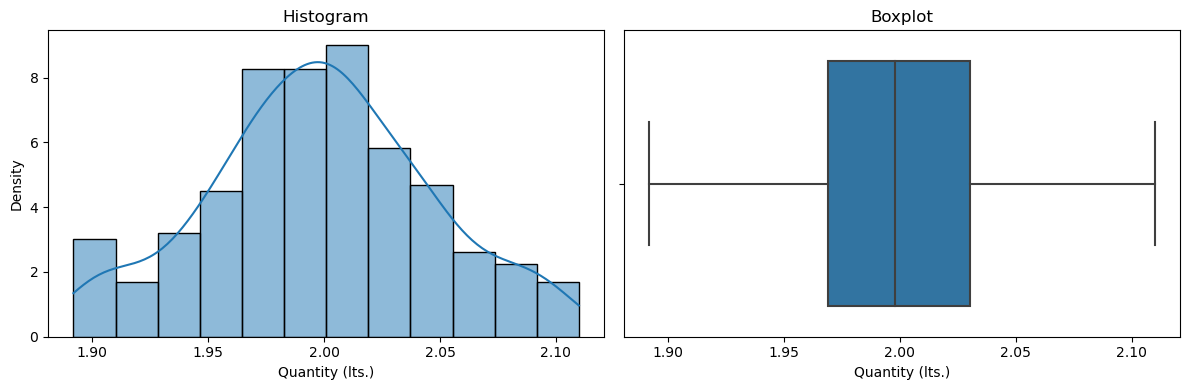

In [14]:
# Please select the correct distribution plots for Quantity in litres.
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data_no_outliers['Quantity (lts.)'], bins=12, kde=True, stat='density', ax=axes[0])
axes[0].set_xlabel("Quantity (lts.)")
axes[0].set_ylabel("Density")
axes[0].set_title("Histogram")
sns.boxplot(x = data_no_outliers['Quantity (lts.)'], data = data_no_outliers, ax=axes[1]).set(title = 'Boxplot')
plt.tight_layout()
plt.show()

Purpose: What do we achieve by analysing these distribution charts? If you closely take a look in these distribution charts, you can clearly see that we witness approximately normal distribution within quantity while the same is overshadowed due to presence of outliers in CO2 dissolved. On top of that, the extremes in carbonation values seems unreasonable and therefore would require a proper treatment in later stages.

A histogram will give you a peek into how your distribution looks like. You can define the number of peaks which means it can be a unimodal, bimodal or multimodal distribution depending on the peaks involved.

A box plot on the other hand helps you understand min, max and interquartile range where most of the data is centred around.

With these 2 charts, you can easily understand the extremes involved in the data. Do understand that extremes/outliers require some thoughtful investigation before we actually take the decision of removing/retaining them.

In [15]:
# Determine the probabilities for Time limit Crossed in individual assemble lines and plot it using visualization.
ad = data_no_outliers.groupby('Assembly Line').agg({'Time limit Crossed' : ['sum', 'count']}).reset_index()
ad

Assembly Line Time limit Crossed      
                               sum count
0             A                 20   136
1             B                 34   157

In [16]:
ad.columns = ['Assembly Line', 'Total_Time_limit_Crossed', 'Total_Observations']
ad

,Assembly Line,Total_Time_limit_Crossed,Total_Observations
0,A,20,136
1,B,34,157


In [17]:
ad['Probability_of_Time_limit_Crossed'] = ad.Total_Time_limit_Crossed / ad.Total_Observations
ad

,Assembly Line,Total_Time_limit_Crossed,Total_Observations,Probability_of_Time_limit_Crossed
0,A,20,136,0.147059
1,B,34,157,0.216561


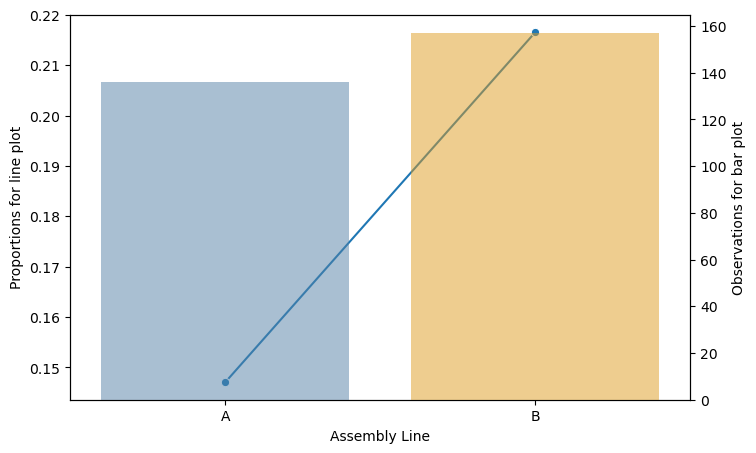

In [18]:
# Identify the correct distribution for the time limit crossed per assembly line.
assembly_Line_colors = {'A': 'steelblue', 'B': 'orange'}
fig, ax = plt.subplots(figsize = (8, 5))
sns.lineplot(data = ad.Probability_of_Time_limit_Crossed, ax = ax, marker = "o")
ax2 = ax.twinx()
sns.barplot(data = ad, x = 'Assembly Line', y = 'Total_Observations', ax = ax2, alpha = 0.5, palette = assembly_Line_colors)
ax.set_ylabel('Proportions for line plot')
ax2.set_ylabel('Observations for bar plot')
ax.set_xlabel('Assembly Line')
plt.show()

In [19]:
# # What’s the correlation between CO2 dissolved and Quantity in litres? Round it off to 2 decimal places.
# (Note: Include the Outliers also)
from scipy.stats import pearsonr
correlation_coefficient, _ = pearsonr(company_data['CO2 dissolved'], company_data['Quantity (lts.)'])
correlation_coefficient = round(correlation_coefficient, 2)
print('The correlation between CO2 dissolved and Quantity in litres is :',correlation_coefficient)

The correlation between CO2 dissolved and Quantity in litres is : 0.05


In [20]:
# Choose True or False for the statement below.
# "Almost all the correlations found within the dataframe are insignificant.”
# First Method:
company_data.corr(numeric_only = True)

,Id,Quantity (lts.),CO2 dissolved,Time limit Crossed
Id,1.000000,0.030649,-0.058282,-0.089417
Quantity (lts.),0.030649,1.000000,0.046983,-0.027994
CO2 dissolved,-0.058282,0.046983,1.000000,-0.061760
Time limit Crossed,-0.089417,-0.027994,-0.061760,1.000000


In [21]:
# Second Method:
numeric_company_data = company_data.select_dtypes(include='number')

correlation_matrix = numeric_company_data.corr()
correlation_matrix

,Id,Quantity (lts.),CO2 dissolved,Time limit Crossed
Id,1.000000,0.030649,-0.058282,-0.089417
Quantity (lts.),0.030649,1.000000,0.046983,-0.027994
CO2 dissolved,-0.058282,0.046983,1.000000,-0.061760
Time limit Crossed,-0.089417,-0.027994,-0.061760,1.000000


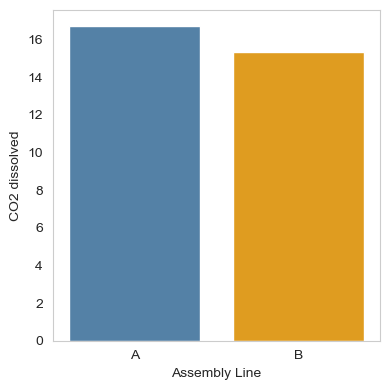

In [23]:
# Please select the correct bar plot defining the relationship between Assembly line and CO2 dissolved.
assembly_Line_colors = {'A': 'steelblue', 'B': 'orange'}
sns.set_style("whitegrid", {'axes.grid' : False})
# Interchange two values on the x-axis
index1 = company_data[company_data['Assembly Line'] == 'B'].index[0]
index2 = company_data[company_data['Assembly Line'] == 'A'].index[0]
company_data.loc[index1], company_data.loc[index2] = company_data.loc[index2], company_data.loc[index1]
plt.figure(figsize = (4,4))
dataset_compare = sns.barplot(x = company_data['Assembly Line'], y = company_data['CO2 dissolved'], palette = assembly_Line_colors, ci = None, estimator='mean')
plt.xlabel("Assembly Line")
plt.ylabel("CO2 dissolved")
plt.tight_layout()
plt.show()

Purpose: Bivariate Analysis is an important tool to understand the associations between variables. Here we can easily witness that there aren’t any significant correlations between numerical variables but we do have some differences in terms of carbonation and number of bottles that are crossing the time limit indicating the issues within the pipelines (though one of the issues could be due to a set of outliers). In later parts of the problem, we will more closely analyse distribution of quantity in litres with respect to assembly lines due to industrial requirement.

Challenge Yourself! Try to perform the analysis of time limit crossed with respect to quantity and CO2 dissolved and see if they seem to pose a problem for higher time limit or not.

This is what we call Univariate and Bivariate Analysis which is a part of EDA.

Kudos for your bravery! One of the very important traits of the data scientist is the ability to find information autonomously. In this course we’ll try to focus on the most fundamental and essential formulas and tools - however, in your real work you will do this several times in a day. So one of our goals is to develop self-learning skills that will be super useful both in your studies and in your work life.

In [24]:
# Identify the correct upper and lower cut off within CO2 dissolved using IQR rule to exclude the outliers.
# Round off to 2 decimal places.
Q1 = company_data['CO2 dissolved'].quantile(0.25) # Calculate the first quartile (Q1)

Q3 = company_data['CO2 dissolved'].quantile(0.75) # Calculate the third quartile (Q3)

IQR = Q3 - Q1 # Calculate the Interquartile Range (IQR)

upper_cutoff = Q3 + 1.5 * IQR # Calculate the upper cutoff

lower_cutoff = Q1 - 1.5 * IQR # Calculate the lower cutoff

print("Lower cutoff (excluding outliers):", round(lower_cutoff, 2))
print("Upper cutoff (excluding outliers):", round(upper_cutoff, 2))

Lower cutoff (excluding outliers): 10.06
Upper cutoff (excluding outliers): 18.19


In [25]:
# After treatment with the outliers, what’s the mean value for CO2 dissolved variable?
mean_CO2_dissolved = round(data_no_outliers['CO2 dissolved'].mean(), 1)
print('After treatment with the outliers, the mean value for CO2 dissolved variable is:',mean_CO2_dissolved)

After treatment with the outliers, the mean value for CO2 dissolved variable is: 14.0


Purpose: Identifying the cut off values in order to deal with outliers are a great way to restrict the data. Now, it depends on the domain/context of the problem that we want to restrict the data to these cut off values or not.

Do understand that these congestion rates are part of a realistic scenario and not because of some error in the data. Therefore, it's better to continue with the analysis as such.

Challenge Yourself! Perform the similar steps as above but this time use z-score or standard deviation rule to get rid of the outliers. Are 2 methods giving similar output?

In [26]:
# Let’s first try to understand the Time limit crossed per assembly line.
# Please identify the respective probabilities for each assembly line [Hint: Use value_counts]
probabilities = data_no_outliers.groupby('Assembly Line')['Time limit Crossed'].value_counts(normalize=True)

print("Probabilities of Time Limit Crossed for each Assembly Line:")
print(probabilities)

Probabilities of Time Limit Crossed for each Assembly Line:
Assembly Line  Time limit Crossed
A              0                     0.852941
               1                     0.147059
B              0                     0.783439
               1                     0.216561
Name: proportion, dtype: float64


In [27]:
# Now considering the probabilities calculated in previous questions,
# Please calculate the probability that 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line B.
# Round it off to 2 decimal places.
from scipy.stats import binom
p = 0.21
n = 50
k = 10
probability = round(binom.pmf(k, n, p), 2)
print('Probability that 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line B is:',probability)

Probability that 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line B is: 0.14


In [28]:
# Please calculate the probability that 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line A. 
# Round it off to 2 decimal places.
from scipy.stats import binom
p = 0.14
n = 50
k = 10
probability = round(binom.pmf(k, n, p), 2)
print('Probability that 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line A is:',probability)

Probability that 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line A is: 0.07


In [29]:
# Please calculate the probability that at least 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line B.
# Round it off to 2 decimal places.
from scipy.stats import binom
p = 0.21
n = 50
k = 10
probability = round(1 - binom.cdf(k, n, p), 2)
print('Probability that at least 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line B:',probability)

Probability that at least 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line B: 0.49


In [30]:
# Please calculate the probability that at least 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line A.
# Round it off to 2 decimal places.
from scipy.stats import binom
p = 0.14
n = 50
k = 10
probability = round(1 - binom.cdf(k, n, p), 2)
print('Probability that at least 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line A is:',probability)

Probability that at least 10 bottles crossed the time limit out of a sample of 50 bottles on Assembly line A is: 0.08


Purpose: By analysing these individual probabilities, we can understand that out of a randomly selected cohort of bottles, what are the chances of crossing the time limit within individual assembly lines. This clearly indicates we may need to further investigate the root cause of taking higher time on assembly line B compared to A.

In 2 Litre soft drink bottles, the drink filled is close to normally distributed. If bottles contain less than 95% of the listed net content (around 1.90 litres), the manufacturer may be penalised by the state office of consumer affairs. Bottles that have a net quantity above 2.1 litres may cause excess spillage upon opening. Evaluate the following:

In [31]:
# What is the probability that the bottle content can be either penalised or have spillage? Round it off to 2 decimal places.
# [Hint: Use mean and SD for quantity variable after outlier removal]
from scipy.stats import norm
mean_quantity = data_no_outliers['Quantity (lts.)'].mean()
std_dev_quantity = data_no_outliers['Quantity (lts.)'].std()
# Calculate the probability of being penalized (less than 1.90 litres)
values_in_ltr1 = 1.90
penalized_probability = norm.cdf(1.90, loc=mean_quantity, scale=std_dev_quantity)

# Calculate the probability of spillage (more than 2.10 litres)
values_in_ltr2 = 2.1
spillage_probability = 1 - norm.cdf(2.10, loc=mean_quantity, scale=std_dev_quantity)

# Calculate the overall probability of either event occurring
probability = penalized_probability + spillage_probability
print('Probability that the bottle content can be either penalised or have spillage is:',round(probability, 2))

Probability that the bottle content can be either penalised or have spillage is: 0.04


In [32]:
# What is the probability that the bottle content is in between 1.95 litres and 2.05 litres? Round it off to 2 decimal places.
# Calculate the probability of being penalized (less than or equal to 1.95 litres)
mean_quantity = data_no_outliers['Quantity (lts.)'].mean()
std_dev_quantity = data_no_outliers['Quantity (lts.)'].std()
# Calculate the probability of spillage (less than or equal to 1.95 litres)
values_in_ltr1 = 1.95
z_score1 = (values_in_ltr1 - mean_quantity) / std_dev_quantity
prob1 = norm.cdf(z_score1)

# Calculate the probability of spillage (less than or equal to 2.05 litres)
values_in_ltr2 = 2.05
z_score2 = (values_in_ltr2 - mean_quantity) / std_dev_quantity
prob2 = norm.cdf(z_score2)

probability_between_1_95_and_2_05 = prob2 - prob1
print('Probability that the bottle content is in between 1.95 litres and 2.05 litres is:',round(probability_between_1_95_and_2_05, 2))

Probability that the bottle content is in between 1.95 litres and 2.05 litres is: 0.7


In [33]:
# Calculate the 90% interval estimate for the Quantity variable.
import scipy.stats as stats
sample_mean = data_no_outliers['Quantity (lts.)'].mean()
sample_std_dev = data_no_outliers['Quantity (lts.)'].std()
# Calculate the sample size
sample_size = len(data_no_outliers)
z_score = 1.645
confidence_interval = (round(sample_mean - 1.645 * sample_std_dev,2),round(sample_mean + 1.645 * sample_std_dev,2))
print("90% Confidence Interval for the average of Hrs variable:", confidence_interval)

90% Confidence Interval for the average of Hrs variable: (1.92, 2.08)
